In [1]:
# Import the dependencies.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import requests 

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Get Key for API
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.

lats=np.random.uniform(-90.000,90.000,size=1500)
lngs=np.random.uniform(-180.000,180.000,size=1500)

lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0],coordinate[1])

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    #print(coordinate[0])
    city=citipy.nearest_city(coordinate[0],coordinate[1])
    print(city.city_name,city.country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)  
#cities

601

In [8]:
# Import the time library and the datetime module from the datetime library 
city_data = []

In [9]:
# Starting URL for Weather Map API Call.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
# for i in cities.loc[5,:]:
#     print(cities)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    #print(city_url) - Not Logging as it contains key
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saint helens
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | olafsvik
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | floriano
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | bosaso
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | pangody
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | marawi
Processing Record 17 of Set 1 | banda aceh
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | zaozerne
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | port augusta
Processing Record 40 of Set 4 | mabai
Processing Record 41 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | kimbe
Processing Record 44 of Set 4 | las cruces
Processing Record 45 of Set 4 | madaoua
Processing Record 46 of Set 4 | khambhat
Processing Record 47 of Set 4 | namatanai
Processing Record 48 of Set 4 | biltine
Processing Record 49 of Set 4 | goderich
Processing Record 50 of Set 4 | fort nelson
Processing Record 1 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 5 | pachino
Processing Record 3 of Set 5 | evensk
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | maraa
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | neuquen
Processing Record 8 of Set 5 | mareeba
Processing Record 9 of Set 5 | lakewood
Processing Record 10 of Set 5 | baykit
Processing Record 11 of Set 5 | warrington
Processing Recor

Processing Record 30 of Set 8 | mayumba
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | goose creek
Processing Record 33 of Set 8 | beyla
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | eureka
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | grafton
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | uva
Processing Record 40 of Set 8 | orlik
Processing Record 41 of Set 8 | novoorsk
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | orbetello
Processing Record 44 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 8 | nadym
Processing Record 46 of Set 8 | grand-lahou
Processing Record 47 of Set 8 | kosh-agach
Processing Record 48 of Set 8 | sao filipe
Processing Record 49 of Set 8 | socorro
Processing Record 50 of Set 8 | port keats
Processing Record 1 of Set 9 | chernelytsya
Processing Record 2 of Set 9 | makakilo city
Processing Record 3 o

City not found. Skipping...
Processing Record 17 of Set 12 | ostrovnoy
Processing Record 18 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 12 | bembereke
Processing Record 20 of Set 12 | camargo
Processing Record 21 of Set 12 | miri
Processing Record 22 of Set 12 | lubuagan
Processing Record 23 of Set 12 | liniere
City not found. Skipping...
Processing Record 24 of Set 12 | sawtell
Processing Record 25 of Set 12 | kibala
Processing Record 26 of Set 12 | kushmurun
Processing Record 27 of Set 12 | salinas
Processing Record 28 of Set 12 | bay roberts
Processing Record 29 of Set 12 | phan thiet
Processing Record 30 of Set 12 | hindaun
Processing Record 31 of Set 12 | miquelon
Processing Record 32 of Set 12 | vilhena
Processing Record 33 of Set 12 | beloha
Processing Record 34 of Set 12 | ondjiva
Processing Record 35 of Set 12 | vardo
Processing Record 36 of Set 12 | sur
Processing Record 37 of Set 12 | esso
Processing Record 38 of Set 12 | ballina
Processi

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Helens,53.4500,-2.7333,51.10,85,100,9.22,GB,2022-04-30 22:26:01
1,Rikitea,-23.1203,-134.9692,75.54,77,61,10.58,PF,2022-04-30 22:26:01
2,Olafsvik,64.8945,-23.7142,44.46,84,99,15.14,IS,2022-04-30 22:26:02
3,Esperance,-33.8667,121.9000,51.64,66,0,6.89,AU,2022-04-30 22:26:02
4,Albany,42.6001,-73.9662,61.57,30,88,9.44,US,2022-04-30 22:26:03
5,Floriano,-6.7669,-43.0225,81.95,47,98,2.19,BR,2022-04-30 22:26:03
6,Guerrero Negro,27.9769,-114.0611,67.69,59,78,16.15,MX,2022-04-30 22:26:04
7,Bosaso,11.2842,49.1816,85.08,66,46,1.12,SO,2022-04-30 22:26:04
8,Sitka,57.0531,-135.3300,53.49,50,40,4.61,US,2022-04-30 22:24:34
9,Arraial Do Cabo,-22.9661,-42.0278,74.03,86,100,13.44,BR,2022-04-30 22:26:05


In [13]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        550 non-null    object 
 1   Lat         550 non-null    float64
 2   Lng         550 non-null    float64
 3   Max Temp    550 non-null    float64
 4   Humidity    550 non-null    int64  
 5   Cloudiness  550 non-null    int64  
 6   Wind Speed  550 non-null    float64
 7   Country     550 non-null    object 
 8   Date        550 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 38.8+ KB


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint Helens,GB,2022-04-30 22:26:01,53.4500,-2.7333,51.10,85,100,9.22
1,Rikitea,PF,2022-04-30 22:26:01,-23.1203,-134.9692,75.54,77,61,10.58
2,Olafsvik,IS,2022-04-30 22:26:02,64.8945,-23.7142,44.46,84,99,15.14
3,Esperance,AU,2022-04-30 22:26:02,-33.8667,121.9000,51.64,66,0,6.89
4,Albany,US,2022-04-30 22:26:03,42.6001,-73.9662,61.57,30,88,9.44
...,...,...,...,...,...,...,...,...,...
545,Ust-Kuyga,RU,2022-04-30 22:40:56,70.0167,135.6000,23.68,85,71,9.24
546,Ewa Beach,US,2022-04-30 22:40:57,21.3156,-158.0072,82.35,60,75,21.85
547,Pueblo Nuevo,MX,2022-04-30 22:40:57,23.3833,-105.3833,75.79,19,6,8.88
548,Bethanien,NA,2022-04-30 22:40:58,-26.5020,17.1583,55.18,27,0,3.09


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
output_data_file = "weather_data/cities.csv"
city_data_df=pd.read_csv(output_data_file,index_col="City_ID")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Saint Helens,GB,2022-04-30 22:26:01,53.4500,-2.7333,51.10,85,100,9.22
1,Rikitea,PF,2022-04-30 22:26:01,-23.1203,-134.9692,75.54,77,61,10.58
2,Olafsvik,IS,2022-04-30 22:26:02,64.8945,-23.7142,44.46,84,99,15.14
3,Esperance,AU,2022-04-30 22:26:02,-33.8667,121.9000,51.64,66,0,6.89
4,Albany,US,2022-04-30 22:26:03,42.6001,-73.9662,61.57,30,88,9.44
...,...,...,...,...,...,...,...,...,...
545,Ust-Kuyga,RU,2022-04-30 22:40:56,70.0167,135.6000,23.68,85,71,9.24
546,Ewa Beach,US,2022-04-30 22:40:57,21.3156,-158.0072,82.35,60,75,21.85
547,Pueblo Nuevo,MX,2022-04-30 22:40:57,23.3833,-105.3833,75.79,19,6,8.88


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

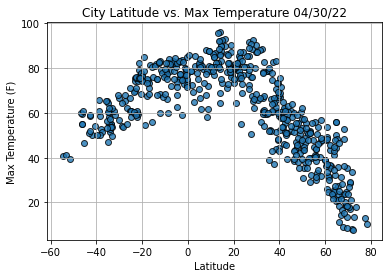

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%x")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

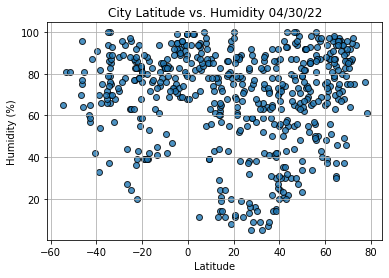

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

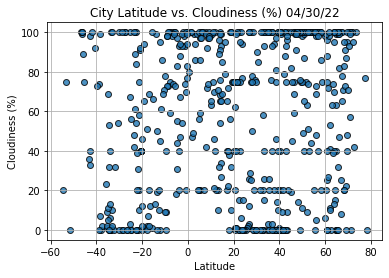

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

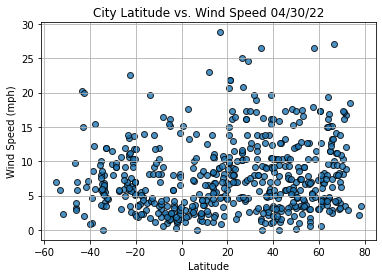

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    print(f"r value - {r_value}")
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


In [24]:
northern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        379 non-null    object 
 1   Country     379 non-null    object 
 2   Date        379 non-null    object 
 3   Lat         379 non-null    float64
 4   Lng         379 non-null    float64
 5   Max Temp    379 non-null    float64
 6   Humidity    379 non-null    int64  
 7   Cloudiness  379 non-null    int64  
 8   Wind Speed  379 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 29.6+ KB


In [25]:
southern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1 to 548
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        171 non-null    object 
 1   Country     162 non-null    object 
 2   Date        171 non-null    object 
 3   Lat         171 non-null    float64
 4   Lng         171 non-null    float64
 5   Max Temp    171 non-null    float64
 6   Humidity    171 non-null    int64  
 7   Cloudiness  171 non-null    int64  
 8   Wind Speed  171 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 13.4+ KB


r value - -0.8717587175381496


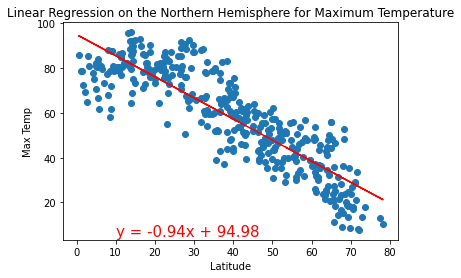

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
             "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                       "Max Temp", (10,5))

r value - 0.7876359360839038


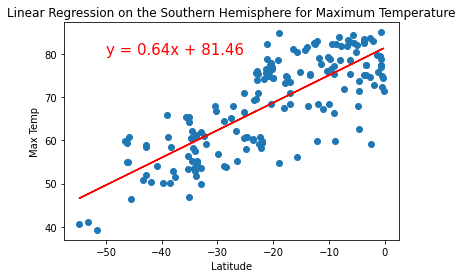

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
             "Linear Regression on the Southern Hemisphere for Maximum Temperature", 
                       'Max Temp',(-50,80))

r value - 0.13881048586523306


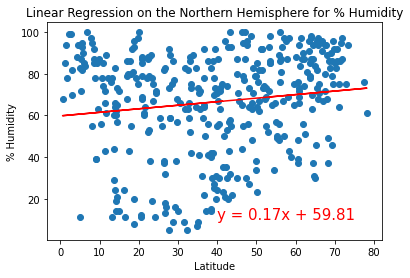

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

r value - 0.18710825317922591


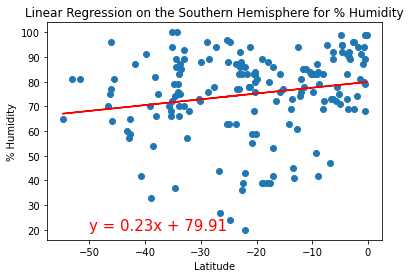

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,20))

r value - 0.02991547407547444


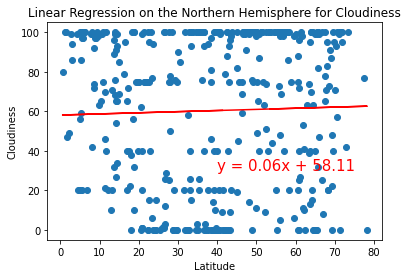

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 
                       'Cloudiness',(40,30))

r value - 0.2655238285096813


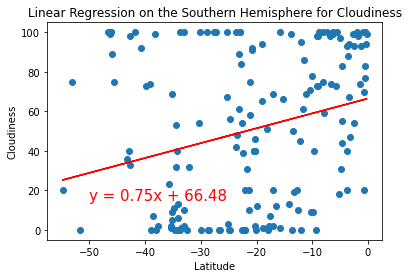

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 
                       'Cloudiness',(-50,15))

r value - 0.07560963734912787


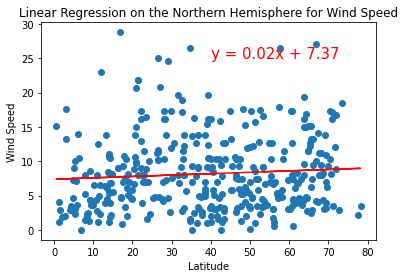

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,25))

r value - -0.19304592642159557


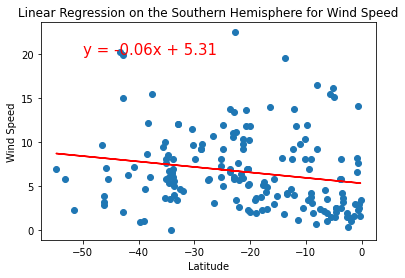

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,20))